# Problem

- predict price for 2nd hand car sales

### critical thinking

- price is affected intuitively by _milage_, _year_, _EngineV_ and _brand_. 
    - Sports car (EngineV) are more expensive than economy
    - BMW (brand) is more expensive than toyoto
    - Old cars (year) are less expensive, except vintage cars
    


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
raw_data = pd.read_csv('dataset/car_sales.csv')

# data['view_map'] = data['view'].map({'No sea view':0, 'Sea view':1}) 

raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Pre-processing

### explore descriptive stats

- **missing values**
    - [x] count is different for all, means there is missing values  
    - [x] price (172 items) and EngineV (150 items) hvea missing values. **Total row=4345**. <5%, so we can delete, those rows
    - [x] the aim was predict price. so null price records can be deleted!
- **dummy variables**
    - [x] Brand, Body, Engine Type and Registration are categorical, and have less than 10 **unique** values, means they have potential as **dummy variables**. 
    - [ ] Model has 312 **unique**, hard to generate dummy variables. 
- **information value**
    - [ ] registration\`s **freq** is 3947, means nearly all values are Yes. So it is not useful. Drop it.
    - [ ] a lot of information of model _can be engineered_ from model, year and EngineV. So model is not useful. Drop it. we won\'t loose to much variability
- **outliers**
    - [x] Price 75% of values under 21k, but max value is 300k. That means there are some outliers in **price**. remove the %1 of them
    - [x] Mileage has some outliers
    - [x] EngineV has some outliers, and >6.5 is not a valid value also.
    - [x] Year has outliers b/w 1969 and 2003 !
    

In [85]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### determine variable of interest

In [4]:
data = raw_data.drop(['Model', 'Registration'], axis=1)


### data cleansing - missing values

In [87]:
data.isnull().sum()

# 150/4345 = 3% < 5%

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
dtype: int64

In [88]:
data = data.dropna(axis=0)

data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011


### outliers

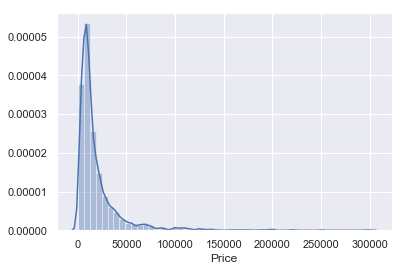

In [89]:
sns.distplot(data['Price'])


In [90]:
# eliminate %1 (%99 quanltile)
q = data['Price'].quantile(0.99)


data_1 = data[data['Price'] < q]

data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


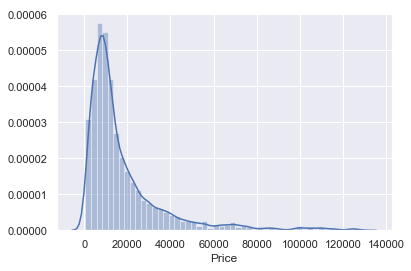

In [91]:
sns.distplot(data_1['Price'])

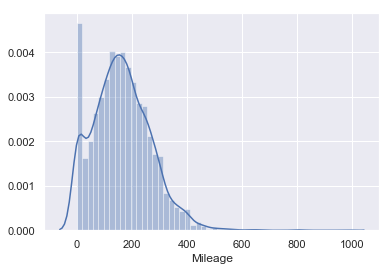

In [92]:
sns.distplot(data['Mileage'])

In [93]:
# eliminate %1 (%99 quanltile)
q = data['Mileage'].quantile(0.99)


data_2 = data_1[data_1['Mileage'] < q]

data_2.describe()

,Price,Mileage,EngineV,Year
count,3943.000000,3943.000000,3943.000000,3943.000000
mean,17936.780614,161.414659,2.747497,2006.393102
std,19009.750360,95.940408,4.981033,6.593870
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21417.500000,230.000000,3.000000,2011.000000
max,129222.000000,433.000000,99.990000,2016.000000


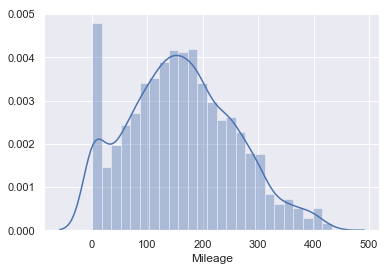

In [94]:
sns.distplot(data_2['Mileage'])

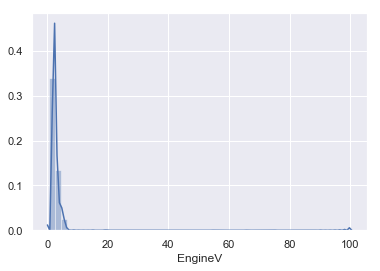

In [95]:
sns.distplot(data['EngineV'])

In [96]:
# eliminate %1 (%99 quantile) or >6.5 is wrong EngineVs
q = 6.5


data_3 = data_2[data_2['EngineV'] < q]

data_3.describe()

,Price,Mileage,EngineV,Year
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,17991.352031,161.209949,2.443304,2006.409184
std,19043.203478,95.980959,0.946242,6.593734
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21500.000000,229.000000,3.000000,2012.000000
max,129222.000000,433.000000,6.300000,2016.000000


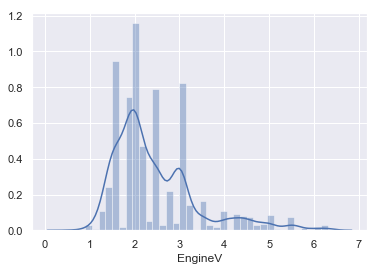

In [97]:
sns.distplot(data_3['EngineV'])

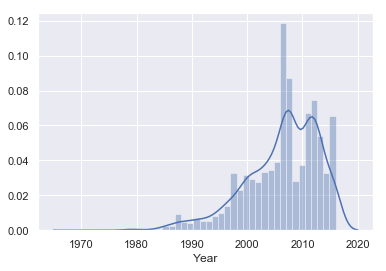

In [98]:
sns.distplot(data['Year'])

In [99]:
# get > %1
q = data['Year'].quantile(0.01)


data_4 = data_3[data_3['Year'] > q]

data_4.describe()

,Price,Mileage,EngineV,Year
count,3866.000000,3866.000000,3866.000000,3866.000000
mean,18197.480629,160.471547,2.450246,2006.713140
std,19087.396949,95.543697,0.949413,6.101235
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,433.000000,6.300000,2016.000000


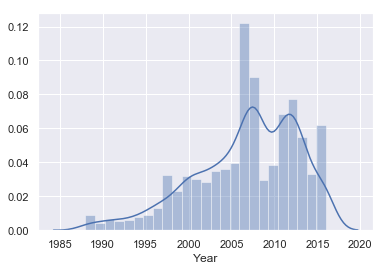

In [100]:
sns.distplot(data_4['Year'])

### end of cleansing

In [101]:
data_cleaned = data_4.reset_index(drop=True)

In [102]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,848,NaN,1466,NaN,NaN,1807,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,2012.000000


# checking OLS assumptions 


- [x] **Normality** (CLT guarantees it) and **Zero µ** (Bias or intercept guarantees it)
- [x] **Homoscedasticity** (log transformation provides it)
    - [x] Price dist. is also not normally distributed (even after missing value and %1 of outlier cleansing). So b/w below features, it is expected that less linearity
    - [x] for numerical features vs Price graps shows, there is no linearity. So **we need to transform**
- [x] **Autocorrelation** is not possible in snapshot data. Observations not dependent which comes from different customers' cars esp.
- [x] **Multicollinearity** check variable_inflation_factor. No data is perfect but *Year* > 10 is definitly correlated w/ other variables


### linearity

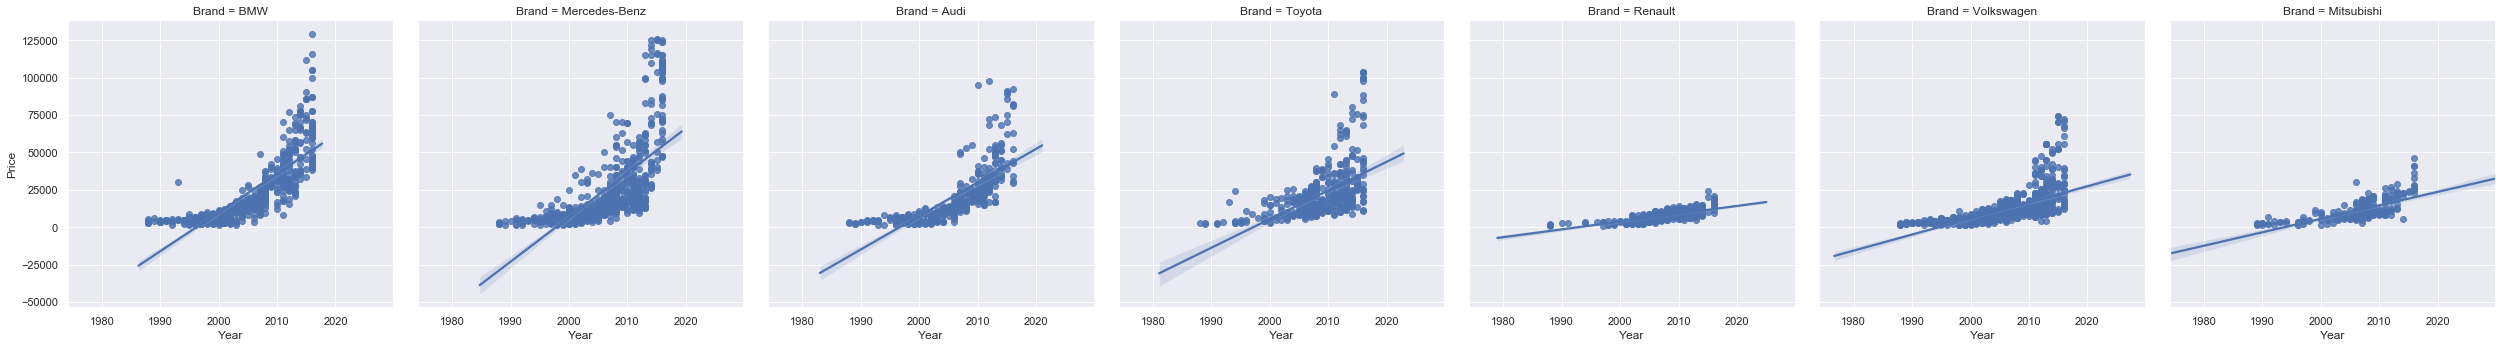

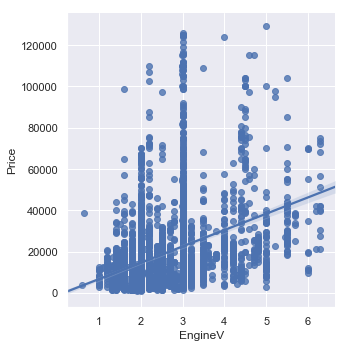

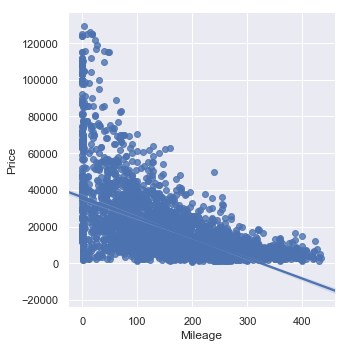

In [103]:
# sns.regplot(x="SAT", y="GPA", data=data);
sns.lmplot(x="Year", y="Price", col='Brand', data=data_cleaned)
sns.lmplot(x="EngineV", y="Price", data=data_cleaned)
sns.lmplot(x="Mileage", y="Price", data=data_cleaned)

### relaxing the assumptions

In [104]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,9.814656


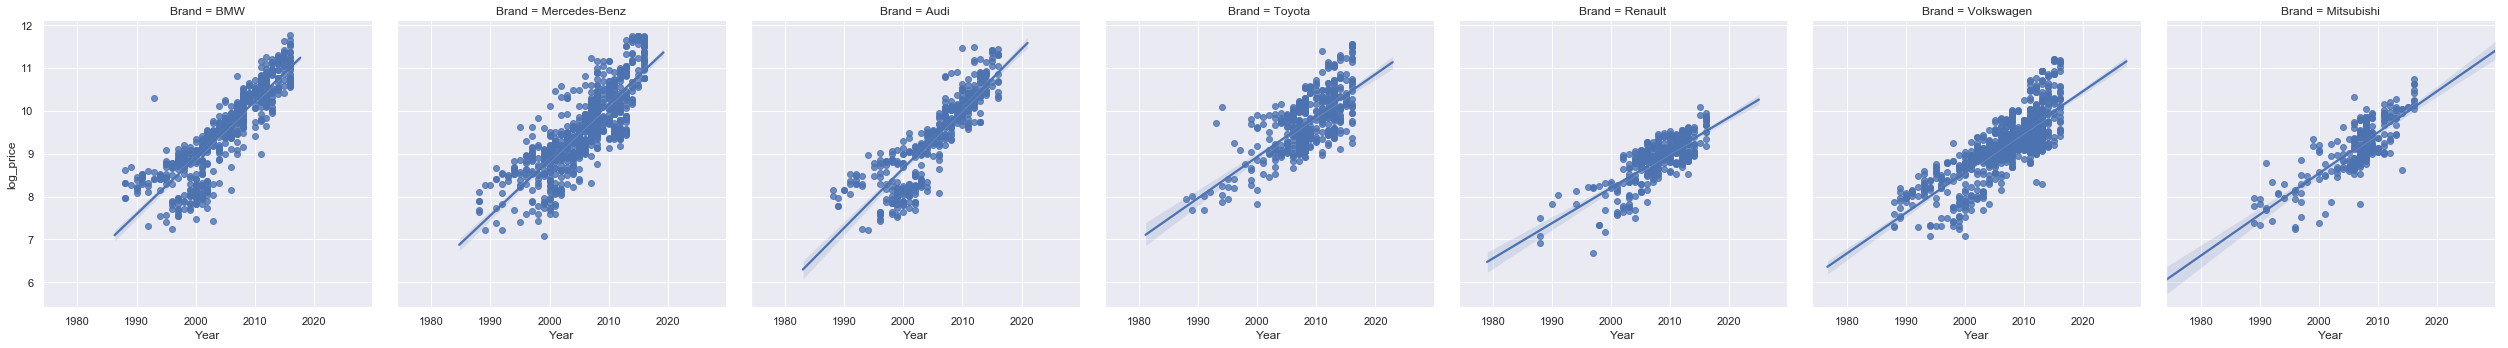

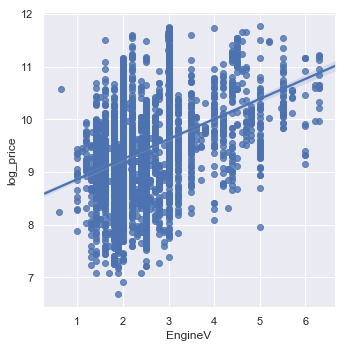

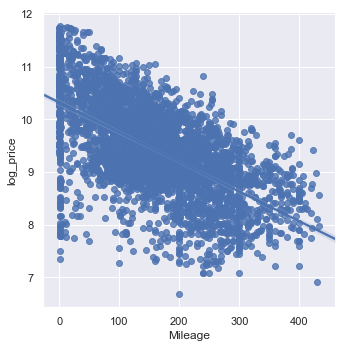

In [105]:
# sns.regplot(x="SAT", y="GPA", data=data);

sns.lmplot(x="Year", y="log_price", col='Brand', data=data_cleaned)
sns.lmplot(x="EngineV", y="log_price", data=data_cleaned)
sns.lmplot(x="Mileage", y="log_price", data=data_cleaned)


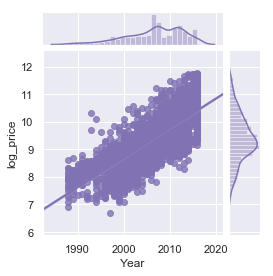

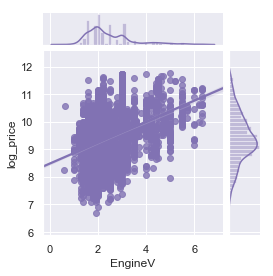

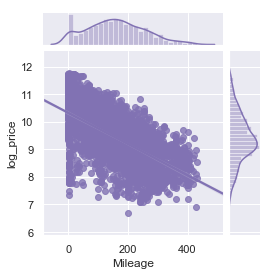

In [106]:
sns.jointplot("Year", "log_price", data=data_cleaned, kind="reg", color="m", height=4)
sns.jointplot("EngineV", "log_price", data=data_cleaned, kind="reg", color="m", height=4)
sns.jointplot("Mileage", "log_price", data=data_cleaned, kind="reg", color="m", height=4)


In [107]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Year,log_price
0,BMW,sedan,277,2.0,Petrol,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,2011,9.814656


### multicollinearity

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## dummy variables are not included yet! This will effects VIF!
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns


In [109]:
vif

,VIF,features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


In [63]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,log_price
0,BMW,sedan,277,2.0,Petrol,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,9.495519
3,Audi,crossover,240,4.2,Petrol,10.043249
4,Toyota,crossover,120,2.0,Petrol,9.814656


# create dummy variables

In [110]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [111]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol'], dtype=object)

In [112]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol']

In [113]:
data_preprocessed = data_with_dummies[cols]

data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Multicollinearity w/ dummies

In [114]:
data_preprocessed.columns.values

array(['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol'], dtype=object)

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## + dummy variables added
variables = data_preprocessed[['Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol']]

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [116]:
vif

,VIF,features
0,4.423233,Mileage
1,6.214114,EngineV
2,2.174048,Brand_BMW
3,2.671228,Brand_Mercedes-Benz
4,1.466589,Brand_Mitsubishi
5,1.795904,Brand_Renault
6,1.943726,Brand_Toyota
7,2.428007,Brand_Volkswagen
8,1.434787,Body_hatch
9,1.495449,Body_other


# regression

### inputs

In [118]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed[['Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol']]

inputs.shape, targets.shape

((3866, 16), (3866,))

### feature scaling

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()

scaler.fit(inputs)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [123]:
inputs_scaled = scaler.transform(inputs)

inputs_scaled[0:3]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 1.21979294, -0.47429745,  2.27936676, -0.49222751, -0.29109492,
        -0.35468411, -0.38452859, -0.5300762 , -0.2646222 , -0.32532329,
         1.27949513, -0.3262947 , -0.43283535, -0.41500071, -0.16211373,
         1.33315372],
       [ 2.7899583 ,  0.47377973, -0.43871834,  2.0315809 , -0.29109492,
        -0.35468411, -0.38452859, -0.5300762 , -0.2646222 , -0.32532329,
        -0.78155827, -0.3262947 ,  2.31034736, -0.41500071, -0.16211373,
        -0.75010104],
       [ 2.06768224,  2.68595982, -0.43871834,  2.0315809 , -0.29109492,
        -0.35468411, -0.38452859, -0.5300762 , -0.2646222 , -0.32532329,
         1.27949513, -0.3262947 , -0.43283535,  2.40963442, -0.16211373,
        -0.75010104]])

### train - test split

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365) 

### create regression

In [129]:
reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [145]:
print('r-squared:', reg.score(x_train, y_train),
      '\nadjusted r-squared:', 1- (1-reg.score(x_train, y_train)) * (x_train.shape[0]-1) / (x_train.shape[0]-x_train.shape[1]-1))


r-squared: 0.6266850815673297 
adjusted r-squared: 0.6247426299592247


### check train 

In [179]:
y_hat_train = reg.predict(x_train)

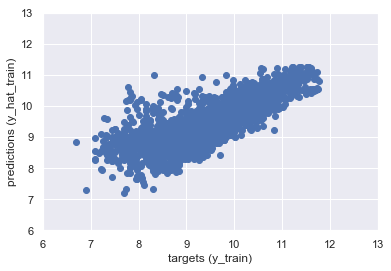

In [180]:
plt.scatter(y_train, y_hat_train)
plt.xlabel('targets (y_train)')
plt.ylabel('predictions (y_hat_train)')

plt.xlim(6,13)
plt.ylim(6,13)

plt.show()

# 45 degrees means it is ok. below is not bad.

In [167]:
x = pd.DataFrame(data=[['Bias', reg.intercept_]],
                 columns=['Features', 'Weights'])

x

,Features,Weights
0,Bias,9.412272


In [168]:
summary = pd.DataFrame(data=inputs.columns.values,
                      columns=['Features'])

summary['Weights'] = reg.coef_


summary

,Features,Weights
0,Mileage,-0.521156
1,EngineV,0.223957
2,Brand_BMW,0.014729
3,Brand_Mercedes-Benz,0.044240
4,Brand_Mitsubishi,-0.110016
5,Brand_Renault,-0.137230
6,Brand_Toyota,-0.022277
7,Brand_Volkswagen,-0.046231
8,Body_hatch,-0.172072
9,Body_other,-0.098783


In [148]:
data_cleaned['Brand'].unique()

# dropped value is Audi (benchmark). which means, bmw, mercedes (+) expensive than audi. the others (-) are cheaper than audi. 

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [149]:
data_cleaned['Body'].unique()

# benchmark = crossover

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [150]:
data_cleaned['Engine Type'].unique()

# benchmark = Diesel

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

# testing

In [199]:
y_hat_test = reg.predict(x_test)

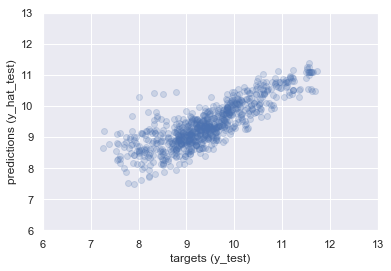

In [200]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('targets (y_test)')
plt.ylabel('predictions (y_hat_test)')

plt.xlim(6,13)
plt.ylim(6,13)

plt.show()

# 45 degrees means it is ok. below is better than train results
# alpha shows us where our model's points' concentration

In [201]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])

df_pf.head()

,Predictions
0,8071.806448
1,8885.679758
2,18896.141033
3,7185.075498
4,8713.689883


In [202]:
y_test = y_test.reset_index(drop=True)

y_test.head()

0    7.740664
1    9.487972
2    8.999619
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [203]:
df_pf['Target'] = np.exp(y_test)

df_pf.head()

,Predictions,Target
0,8071.806448,2300.0
1,8885.679758,13200.0
2,18896.141033,8100.0
3,7185.075498,6400.0
4,8713.689883,9150.0


In [204]:
df_pf['Residuals'] = df_pf['Target'] - df_pf['Predictions']

df_pf['Difference%'] = np.abs(df_pf['Residuals']/df_pf['Target'] * 100)

df_pf.head()

,Predictions,Target,Residuals,Difference%
0,8071.806448,2300.0,-5771.806448,250.948106
1,8885.679758,13200.0,4314.320242,32.684244
2,18896.141033,8100.0,-10796.141033,133.285692
3,7185.075498,6400.0,-785.075498,12.266805
4,8713.689883,9150.0,436.310117,4.768417


In [205]:
df_pf.describe()

# min difference% very close to 0, but max and %75 percentile has very big gap !

,Predictions,Target,Residuals,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15833.493518,18612.010504,2778.516986,43.959332
std,13698.462997,20953.006281,11126.850019,71.443868
min,1787.564844,1400.000000,-29399.204029,0.099948
25%,7276.791846,6999.250000,-2137.500486,12.802350
50%,10944.033353,11500.000000,671.702887,26.547231
75%,18863.778766,20500.000000,3986.236808,47.235461
max,87896.463781,124000.000000,83209.434959,887.915698


In [212]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_pf.sort_values("Difference%", axis = 0, ascending = False)

df_pf

# 25+ records have very small Target values. and their predictions are higer than target

# that means we are omitting some varibles which affects the price. or we may dropped model, and that's what happend.

,Predictions,Target,Residuals,Difference%
695,29637.47,3000.00,-26637.47,887.92
150,33499.20,4100.00,-29399.20,717.05
635,9742.76,1450.00,-8292.76,571.91
639,31947.69,4999.00,-26948.69,539.08
82,16156.51,2600.00,-13556.51,521.40
462,35079.83,6500.00,-28579.83,439.69
619,18055.47,3600.00,-14455.47,401.54
485,8834.43,1900.00,-6934.43,364.97
382,9285.42,2000.00,-7285.42,364.27
111,18423.79,4300.00,-14123.79,328.46


# how to improve model

- use a different set of features
- remove a bigger part of outliers
-  use different kind of transformations